In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import sklearn
from sklearn.model_selection import train_test_split
from rich.progress import Progress
import random
from tensorflow import keras
import seaborn as sns
from keras import models,layers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve,average_precision_score

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

In [4]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

In [5]:
def build_lenet_model():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(28,28,1)),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=5, activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [6]:
model = build_lenet_model()

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, Y_test)
)


Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2385 - accuracy: 0.9295 - val_loss: 0.1140 - val_accuracy: 0.9643
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0916 - accuracy: 0.9718 - val_loss: 0.0719 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0632 - accuracy: 0.9801 - val_loss: 0.0601 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0609 - val_accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0447 - val_accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0447 -

In [10]:
loss_train = history.history['loss']
accuracy_train = history.history['accuracy']

loss_test = history.history['val_loss']
accuracy_test = history.history['val_accuracy']

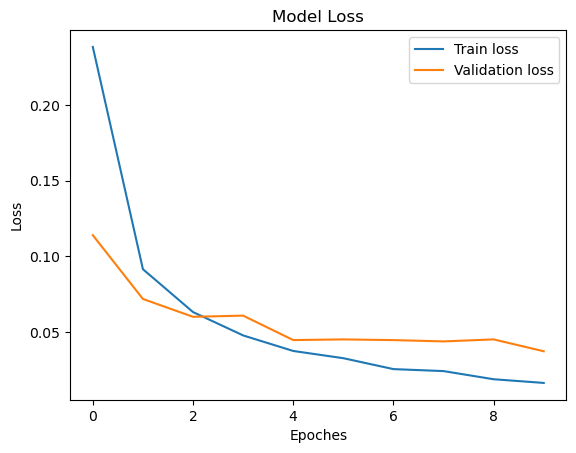

In [11]:
plt.figure()
plt.plot(loss_train)
plt.plot(loss_test)
plt.title('Model Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend(['Train loss','Validation loss'])
plt.show()

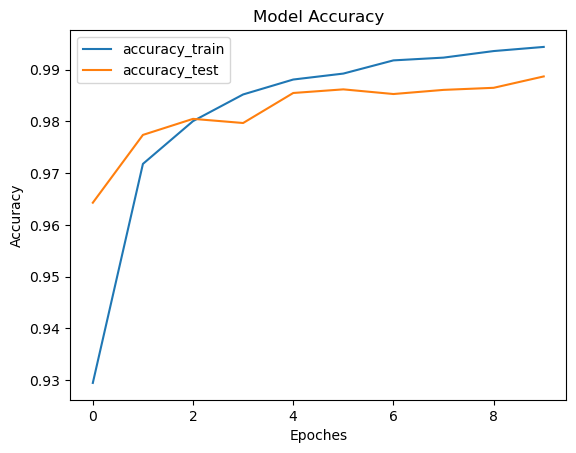

In [12]:
plt.figure()
plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.title('Model Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(['accuracy_train','accuracy_test'])
plt.show()

In [13]:
prediction = model.predict(X_test)
y_prd = np.argmax(prediction,axis=1)

313/313 [==============================] - 3s 8ms/step


In [14]:
print(y_prd[5])
print(Y_test[5])

1
1


Saved heatmap to ../outputs/heatmap.png


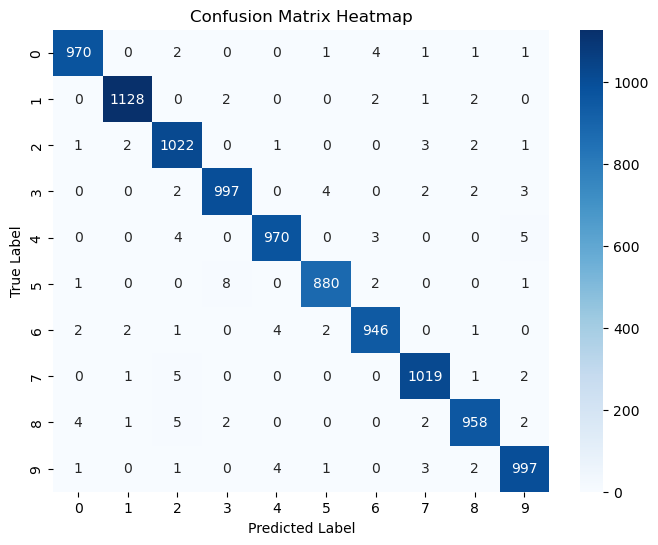

In [15]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_prd)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=range(10),
    yticklabels=range(10)
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
save_path = '../outputs/heatmap.png'
plt.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Saved heatmap to {save_path}")
plt.show()

In [16]:
model.save('../models/mnist_tensorflow_prediction_model.keras')

In [17]:
Y_test_bin = label_binarize(Y_test, classes=[0,1,2,3,4,5,6,7,8,9])

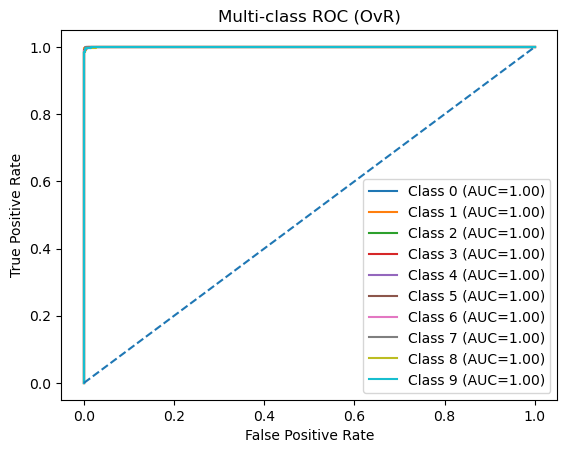

In [ ]:
plt.figure()

for i in range(10):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], prediction[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC (OvR)')
plt.legend()
plt.show()

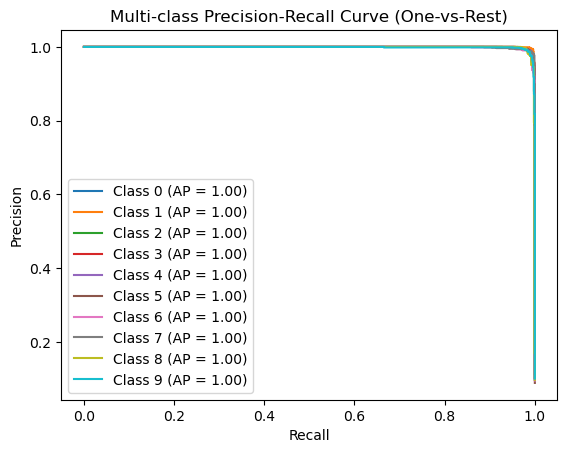

In [19]:
plt.figure()

for i in range(10):
    precision, recall, _ = precision_recall_curve(
        Y_test_bin[:, i],
        prediction[:, i]
    )
    
    avg_precision = average_precision_score(
        Y_test_bin[:, i],
        prediction[:, i]
    )
    
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve (One-vs-Rest)')
plt.legend()
plt.show()